In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import numpy as np
import wrangle
from scipy import stats
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [2]:
df = wrangle.get_telco_data()
df.shape

(7043, 24)

In [3]:
df = wrangle.prep_telco(df)


In [4]:
df['total_charges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: total_charges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [5]:
for i in df.columns:
    print(df[i].value_counts(dropna=False))

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: senior_citizen, dtype: int64
No     3641
Yes    3402
Name: partner, dtype: int64
No     4933
Yes    2110
Name: dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
9     119
70    119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
16     80
56     80
52     80
64     80
25     79
26     79
14     76
65     76
61     76
60     76
46     74
19     73
27     72
29     72
30     72
63     72
20     71
53     70
62     70
41     70
32     69
50     68
54     68
47     68
51     68
58     67
49     66
31     65
43     65

In [6]:
train, validate, test = wrangle.split_data(df, 'churn')

In [7]:
train.churn_Yes

5911    0
2479    0
5889    1
6087    0
785     0
       ..
6102    1
356     0
1756    1
2127    0
3586    0
Name: churn_Yes, Length: 4225, dtype: int64

- does payment type affect churn


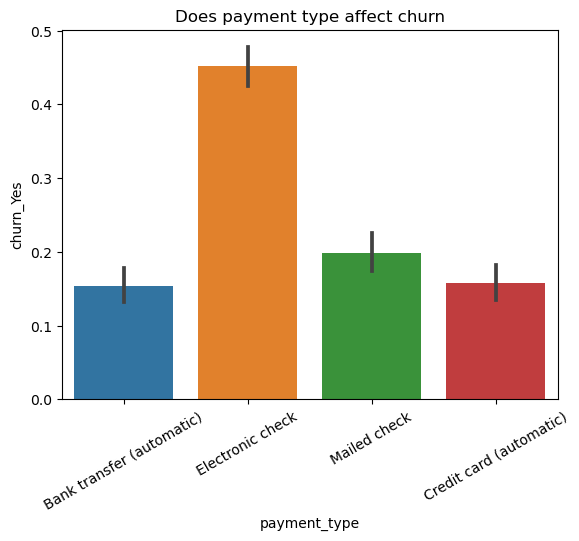

In [8]:
plt.title('Does payment type affect churn')
ax = sns.barplot(x='payment_type', y ='churn_Yes', data = train)
ax.tick_params(axis='x', rotation=30)
plt.show()

- does contract type affect churn

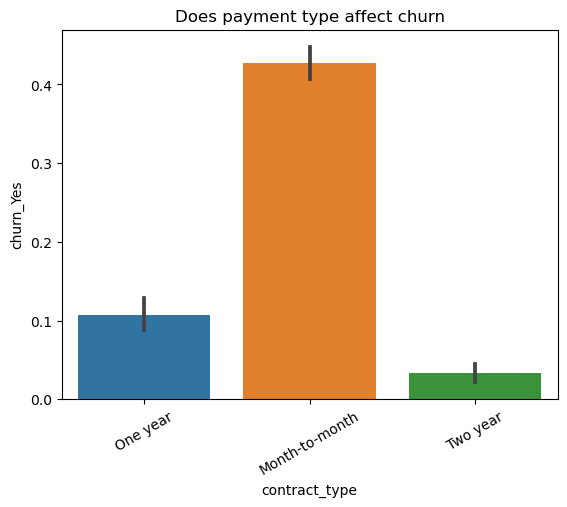

In [9]:
plt.title('Does payment type affect churn')
ax = sns.barplot(x='contract_type', y ='churn_Yes', data = train)
ax.tick_params(axis='x', rotation=30)
plt.show()

- are people without device pretection more likely to churn


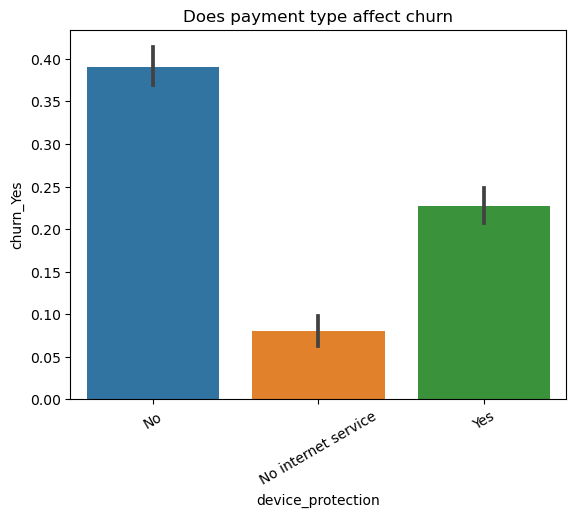

In [10]:
plt.title('Does payment type affect churn')
ax = sns.barplot(x='device_protection', y ='churn_Yes', data = train)
ax.tick_params(axis='x', rotation=30)
plt.show()

- a higher percentage of people who have churned did not have device protection
<br><br>
- we assume a normal distribution because of the amount of samples being over 500
<br>
<b>I will now use a chi-square test to investigate weather "device_protection" and "churn_Yes" are related.</b>
<br>
- I will use a confidence interval of 95%
- the resulting alpha is .05

<b>Ho: device_protection and churn_Yes are independent of one another</b>

<b>Ha: device_protection and churn_Yes are dependent on one another</b>

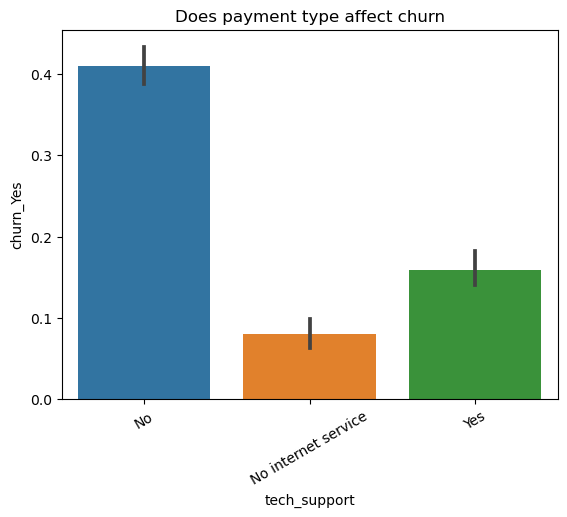

In [11]:
plt.title('Does payment type affect churn')
ax = sns.barplot(x='tech_support', y ='churn_Yes', data = train)
ax.tick_params(axis='x', rotation=30)
plt.show()

In [12]:
observed = pd.crosstab(train.churn_Yes, train.tech_support)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(p)


1.3436559397518597e-99


In [13]:
r, p = stats.pearsonr(train.churn_Yes, train.tech_support_Yes)
print(r, p)



-0.15307026362516818 1.4395902682432182e-23


In [14]:
train.churn_Yes.value_counts()
train['baseline'] = 0
(train.baseline == train.churn_Yes).mean()

0.7346745562130178

In [15]:
X_train = train.loc[:, ['tech_support_Yes','device_protection_Yes','contract_type_Two year','contract_type_One year','payment_type_Credit_card','payment_type_Electronic_check','payment_type_Mailed_check']]
X_validate = validate.loc[:, ['tech_support_Yes','device_protection_Yes','contract_type_Two year','contract_type_One year','payment_type_Credit_card','payment_type_Electronic_check','payment_type_Mailed_check']]
X_test = validate.loc[:, ['tech_support_Yes','device_protection_Yes','contract_type_Two year','contract_type_One year','payment_type_Credit_card','payment_type_Electronic_check','payment_type_Mailed_check']]

y_train = train.churn_Yes.astype('int')
y_validate = validate.churn_Yes.astype('int')
y_test = test.churn_Yes.astype('int')

tree = DecisionTreeClassifier(random_state = 123)
tree.fit(X_train, y_train)



the_percentages = []
churn_predict = []

for i in tree.predict_proba(X_test):
    the_percentages.append(i[0])
    if i[0] > .5:
        churn_predict.append('no')
    else:
        churn_predict.append('yes')
     
    
the_csv_dataframe = pd.DataFrame({'customer_id':test.customer_id, 
                                  'Probability_of_churn':the_percentages,
                                  'Churn_predict':churn_predict
                                 })
the_csv_dataframe.to_csv('Churn_Predictions.csv')

the_csv_dataframe

,customer_id,Probability_of_churn,Churn_predict
3160,4531-AUZNK,0.797297,no
1577,2296-DKZFP,0.857143,no
6823,9692-TUSXH,0.440510,yes
3615,5129-JLPIS,0.992063,no
882,1273-MTETI,0.440510,yes
...,...,...,...
1097,1597-FZREH,0.440510,yes
6441,9117-SHLZX,0.639344,no
5985,8441-SHIPE,0.911765,no
2452,3511-BFTJW,0.972973,no


In [16]:
df = pd.read_csv('Churn_Predictions.csv')
df

,Unnamed: 0,customer_id,Probability_of_churn,Churn_predict
0,3160,4531-AUZNK,0.797297,no
1,1577,2296-DKZFP,0.857143,no
2,6823,9692-TUSXH,0.440510,yes
3,3615,5129-JLPIS,0.992063,no
4,882,1273-MTETI,0.440510,yes
...,...,...,...,...
1404,1097,1597-FZREH,0.440510,yes
1405,6441,9117-SHLZX,0.639344,no
1406,5985,8441-SHIPE,0.911765,no
1407,2452,3511-BFTJW,0.972973,no


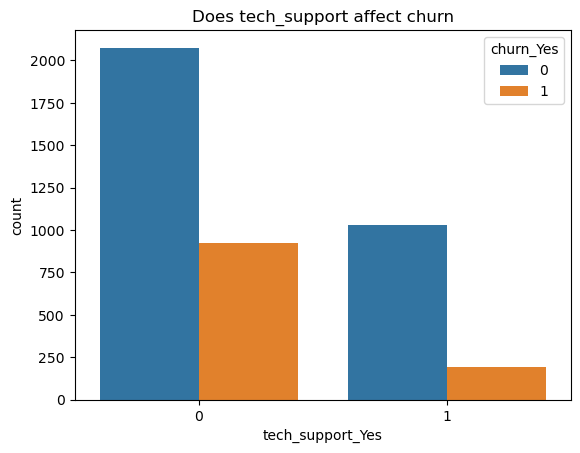

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,payment_type_Credit_card,payment_type_Electronic_check,payment_type_Mailed_check,baseline
5911,8319-QBEHW,Male,0,No,Yes,26,No,No phone service,No,Yes,No,No,Yes,No,Yes,39.95,1023.75,No,One year,DSL,Bank transfer (automatic),1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0
2479,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,26.9,1250.85,No,One year,None,Electronic check,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5889,8280-MQRQN,Female,0,No,No,1,Yes,No,No,No,Yes,No,No,No,Yes,50.45,50.45,Yes,Month-to-month,DSL,Mailed check,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
6087,8626-PTQGE,Male,0,No,No,69,No,No phone service,Yes,Yes,No,Yes,Yes,Yes,Yes,60.05,4176.70,No,Two year,DSL,Bank transfer (automatic),1,0,0,0,1,0,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0
785,1142-IHLOO,Female,0,No,No,51,Yes,No,No,No,No,No,Yes,Yes,No,87.55,4475.90,No,One year,Fiber optic,Credit card (automatic),0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,8642-GVWRF,Female,0,Yes,No,2,Yes,No,No,Yes,Yes,No,No,No,No,79.7,165.00,Yes,Month-to-month,Fiber optic,Bank transfer (automatic),0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0
356,0523-VNGTF,Female,1,No,No,52,No,No phone service,No,Yes,Yes,Yes,Yes,No,Yes,50.5,2566.30,No,Month-to-month,DSL,Electronic check,0,0,0,0,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0
1756,2568-BRGYX,Male,0,No,No,4,Yes,No,No,No,No,No,No,No,Yes,70.2,237.95,Yes,Month-to-month,Fiber optic,Electronic check,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0
2127,3057-VJJQE,Male,0,No,No,35,Yes,Yes,Yes,No,No,No,No,No,No,55.25,1924.10,No,Two year,DSL,Mailed check,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [17]:
plt.title('Does tech_support affect churn')
ax = sns.countplot(x='tech_support_Yes', data = train, hue = 'churn_Yes')
plt.show()
train